In [1]:
import h5py
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def extract_melt_front(file_path, f_threshold=0.5):
    """
    Extract 1D melt-front position from 2D liquid fraction field.

    Parameters
    ----------
    file_path : str
        Path to .h5 PCM dataset file
    f_threshold : float
        Liquid fraction defining melt front (default = 0.5)

    Returns
    -------
    times : ndarray (nt,)
        Time array
    x_front : ndarray (nt,)
        Melt front position vs time
    """
    with h5py.File(file_path, "r") as f:
        f_liq = f["case/f"][:]      # (nt, ny, nx)
        times = f["case/times"][:]  # (nt,)
        x = f["case/x"][:]          # (nx,)

    nt = len(times)
    x_front = np.full(nt, np.nan)

    for n in range(nt):
        # Average liquid fraction across y-direction
        f_mean_x = f_liq[n].mean(axis=0)  # (nx,)

        # Find first x-location where f >= threshold
        idx = np.where(f_mean_x >= f_threshold)[0]
        if len(idx) > 0:
            x_front[n] = x[idx[0]]

    return times, x_front

In [4]:
case_ids = [0, 40, 80]  # low, medium, high heat flux
dataset_dir = "pcm_dataset_2D"

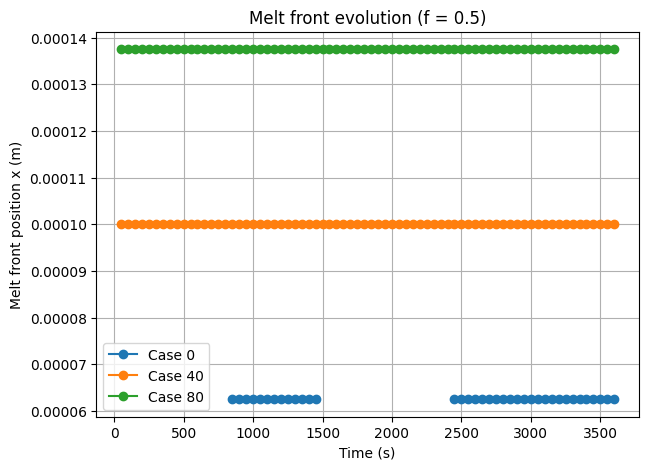

In [5]:
plt.figure(figsize=(7,5))

for cid in case_ids:
    file = f"{dataset_dir}/pcm2D_case_{cid:04d}.h5"
    times, x_front = extract_melt_front(file)
    
    plt.plot(times, x_front, marker='o', label=f"Case {cid}")

plt.xlabel("Time (s)")
plt.ylabel("Melt front position x (m)")
plt.title("Melt front evolution (f = 0.5)")
plt.legend()
plt.grid(True)
plt.show()